# Parabolic Plasma Channel 

2D simulation of a laser propagating without diffraction in a custom plasma density profile

## Matched Condition

In [1]:
# Add zpic library to path
import sys
sys.path.append("../../lib")

import em2d as zpic
import numpy as np

W0_laser=2.0 #this is the laser spot size (W0)
alpha=4.0/W0_laser**4 #matching condition required for the custom density
axis_laser=6.4
omega0_laser=10.0 #important to calculate Rayleigh length

# Custom density profiles along x and y (density(x,y)=density_x(x)*density_y(y))
def density_x(x):
    if x>10:
        return 1.0
    return 0.0

def density_y(y):
    return 1.0+alpha*(y-axis_laser)*(y-axis_laser) #y^2

dt = 0.019


#Simulation box
nx  = [ 500, 128 ]
box = [ 10.0, 12.8 ]

# Particles per cell
ppc = [3,3]


parabolic_density = zpic.Density( type = "custom", custom_x = density_x, custom_y = density_y )

electrons = zpic.Species( "electrons", -1.0, ppc,
                           density = parabolic_density)

# Initialize simulation
sim = zpic.Simulation( nx, box, dt, species = electrons )

# Add laser pulse
sim.add_laser( zpic.Laser( type = "gaussian", start = 8.0, fwhm = 2.0, a0 = 0.3, omega0 = omega0_laser, 
                           W0 = W0_laser, focus = 10.0, axis = axis_laser, polarization = np.pi/2 ))


# Set moving window
sim.set_moving_window()

# Set current smoothing
sim.set_smooth( zpic.Smooth(xtype = "compensated", xlevel = 4) )
emz_at_zero=sim.emf.Ez.copy()

In [2]:
# Run the simulation
tmax = W0_laser**2*omega0_laser #2xRayleigh length
#tmax=1
sim.run( tmax )


Running simulation up to t = 40 ...
n = 2106, t = 40.014
Done.


### Density

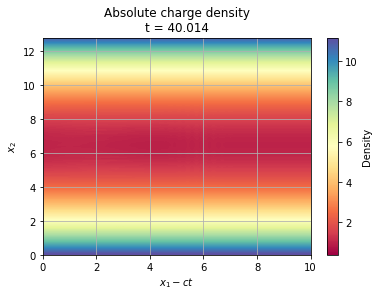

In [3]:
import matplotlib.pyplot as plt

charge = np.abs(electrons.charge())
range = [[0,sim.box[0]],[0,sim.box[1]]]

plt.xlabel("$x_1-ct$")
plt.ylabel("$x_2$")

plt.imshow( charge, interpolation = 'bilinear', origin = 'lower',
          extent = ( range[0][0], range[0][1], range[1][0], range[1][1] ),
          aspect = 'auto', cmap = 'Spectral' )
plt.colorbar().set_label('Density')

plt.title("Absolute charge density\nt = {:g}".format(sim.t))

plt.grid(True)
plt.show()

Text(0, 0.5, 'Density')

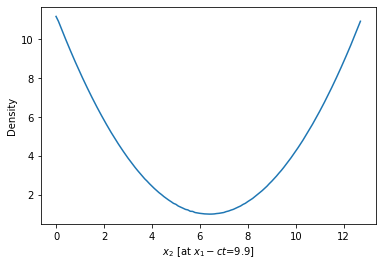

In [4]:
#Let's check the density at a certain csi=x1-ct
charge = np.abs(electrons.charge()) #This is the absolute value of the electron charge
range = [[0,sim.box[0]],[0,sim.box[1]]]
csi=9.9 # this is the csi we want to observe, but we need to calculate what is the index
         # so we can look it up in the charge matrix
    
    
x_index=int((csi-range[0][0])/(range[0][1]-range[0][0])*nx[0])
plt.plot([box[1]/nx[1]*i for i in np.arange(nx[1])],charge[:,x_index]);
plt.xlabel("$x_2$ [at $x_1-ct$="+str(csi)+"]");
plt.ylabel("Density")

### Laser Field

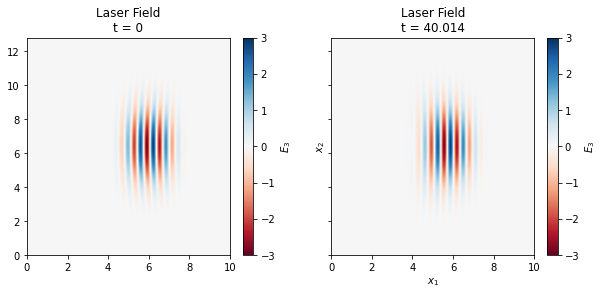

In [5]:
import matplotlib.pyplot as plt

range = [[0,sim.box[0]],[0,sim.box[1]]]
fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

at_zero=axs[0].imshow( emz_at_zero, interpolation = 'bilinear', origin = 'lower',
          extent = ( range[0][0], range[0][1], range[1][0], range[1][1] ),
          aspect = 'auto', cmap = 'RdBu',vmin=-0.3*10,vmax=0.3*10) #limits are +- a0*omega0
fig.colorbar(at_zero,ax=axs[0],label='$E_3$')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
axs[0].title.set_text("Laser Field\nt = {:g}".format(0))
#axs[0].title("Laser Field\nt = {:g}".format(0))
final_time=axs[1].imshow( sim.emf.Ez, interpolation = 'bilinear', origin = 'lower',
          extent = ( range[0][0], range[0][1], range[1][0], range[1][1] ),
          aspect = 'auto', cmap = 'RdBu',vmin=-0.3*10,vmax=0.3*10) #limits are +- a0*omega0
fig.colorbar(final_time, ax=axs[1],label='$E_3$')

plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Laser Field\nt = {:g}".format(sim.t))

plt.show()

## Unmatched condition, propagation in vacuum

In [6]:
# Add zpic library to path
import sys
sys.path.append("../../lib")

import em2d as zpic
import numpy as np

W0_laser=2.0 #this is the laser spot size (W0)
#alpha=0.0/W0_laser**4 #matching condition required for the custom density
axis_laser=6.4
omega0_laser=10.0

# Custom density profiles along x and y (density(x,y)=density_x(x)*density_y(y))
def density_x(x):
    return 0.0

def density_y(y):
    return 0.0

dt = 0.019


#Simulation box
nx  = [ 500, 128 ]
box = [ 10.0, 12.8 ]

# Particles per cell
ppc = [3,3]


parabolic_density = zpic.Density( type = "custom", custom_x = density_x, custom_y = density_y )

electrons = zpic.Species( "electrons", -1.0, ppc,
                           density = parabolic_density)

# Initialize simulation
sim = zpic.Simulation( nx, box, dt, species = electrons )

# Add laser pulse
sim.add_laser( zpic.Laser( type = "gaussian", start = 8.0, fwhm = 2.0, a0 = 0.3, omega0 = omega0_laser, 
                           W0 = W0_laser, focus = 10.0, axis = axis_laser, polarization = np.pi/2 ))


# Set moving window
sim.set_moving_window()

# Set current smoothing
sim.set_smooth( zpic.Smooth(xtype = "compensated", xlevel = 4) )
emz_at_zero=sim.emf.Ez.copy()

In [7]:
# Run the simulation
tmax = 2*0.5*W0_laser**2*omega0_laser #Rayleigh length

sim.run( tmax )


Running simulation up to t = 40 ...
n = 2106, t = 40.014
Done.


### Laser Field

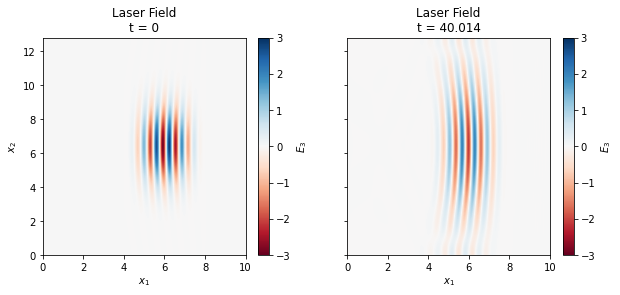

In [8]:
import matplotlib.pyplot as plt

range = [[0,sim.box[0]],[0,sim.box[1]]]
fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

at_zero=axs[0].imshow( emz_at_zero, interpolation = 'bilinear', origin = 'lower',
          extent = ( range[0][0], range[0][1], range[1][0], range[1][1] ),
          aspect = 'auto', cmap = 'RdBu',vmin=-0.3*10,vmax=0.3*10) #limits are +- a0*omega0
axs[0].set_xlabel("$x_1$")
axs[0].set_ylabel("$x_2$")
axs[0].title.set_text("Laser Field\nt = {:g}".format(0))
fig.colorbar(at_zero,ax=axs[0],label='$E_3$')
#axs[0].title("Laser Field\nt = {:g}".format(0))
final_time=axs[1].imshow( sim.emf.Ez, interpolation = 'bilinear', origin = 'lower',
          extent = ( range[0][0], range[0][1], range[1][0], range[1][1] ),
          aspect = 'auto', cmap = 'RdBu',vmin=-0.3*10,vmax=0.3*10)#limits are +- a0*omega0
fig.colorbar(final_time, ax=axs[1],label='$E_3$')

plt.xlabel("$x_1$")
#plt.ylabel("$x_2$")
plt.title("Laser Field\nt = {:g}".format(sim.t))

plt.show()